in this coding, we are going to use student's data and try to predict if they will pass or fail 

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('C:/Users/solan/python_things/student_prediction.csv')

In [24]:
# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   student_id      student_name  Study Hours  Previous Exam Score  Math_score  \
0           1        John Smith         4.37                81.89          80   
1           2     Emily Johnson         9.56                72.17          74   
2           3  Michael Williams         7.59                58.57          51   
3           4       Sarah Brown         6.39                88.83          80   
4           5       David Jones         2.40                81.08          80   

   English_score Pass/Fail  
0             40      Fail  
1             90      Pass  
2             70      Fail  
3             60      Pass  
4             33      Fail  


In [25]:
# Summary statistics
print("\nSummary statistics of numeric columns:")
print(df.describe())


Summary statistics of numeric columns:
       student_id  Study Hours  Previous Exam Score  Math_score  English_score
count  500.000000   499.000000           499.000000  500.000000     500.000000
mean   250.500000     5.483327            68.863166   65.334000      54.666000
std    144.481833     2.689445            17.104397   17.265185      21.046338
min      1.000000     1.050000            40.280000   40.000000     -23.000000
25%    125.750000     3.170000            53.740000   51.000000      35.000000
50%    250.500000     5.610000            68.290000   62.000000      50.000000
75%    375.250000     7.810000            83.440000   80.000000      70.000000
max    500.000000     9.940000            99.980000  125.000000      90.000000


In [29]:
# check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           500 non-null    int64  
 1   student_name         500 non-null    object 
 2   Study Hours          499 non-null    float64
 3   Previous Exam Score  499 non-null    float64
 4   Math_score           500 non-null    int64  
 5   English_score        500 non-null    int64  
 6   Pass/Fail            500 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 27.5+ KB


In [31]:
# Check unique values in pass/fail column
print("\nUnique values in Pass/Fail column:")
print(df['Pass/Fail'].unique())



Unique values in Pass/Fail column:
['Fail' 'Pass']


In [30]:
# Check value counts of pass/fail column
print("\nValue counts of Pass/Fail column:")
print(df['Pass/Fail'].value_counts())
# as we can see Y-variable is not completely biased, it is 66:33


Value counts of Pass/Fail column:
Fail    316
Pass    184
Name: Pass/Fail, dtype: int64


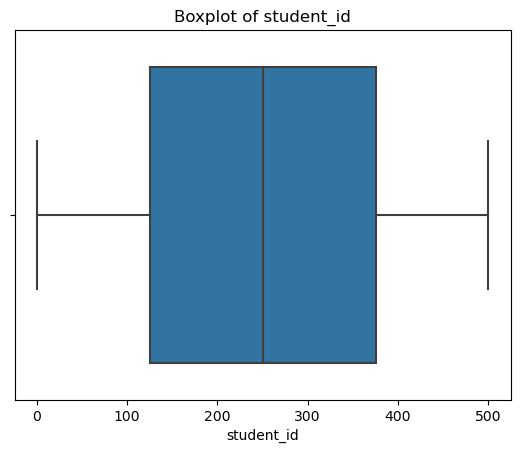

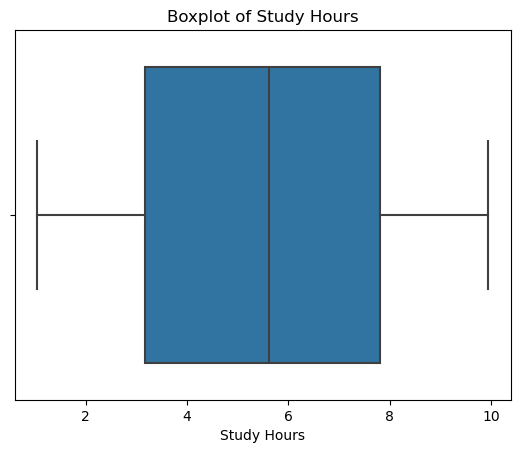

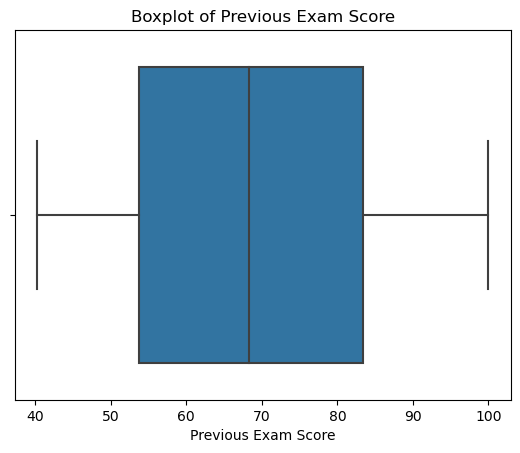

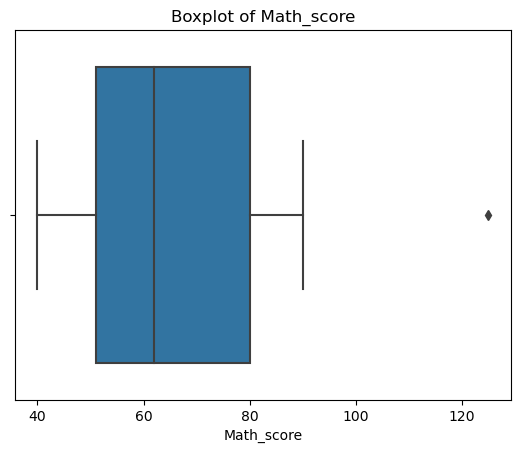

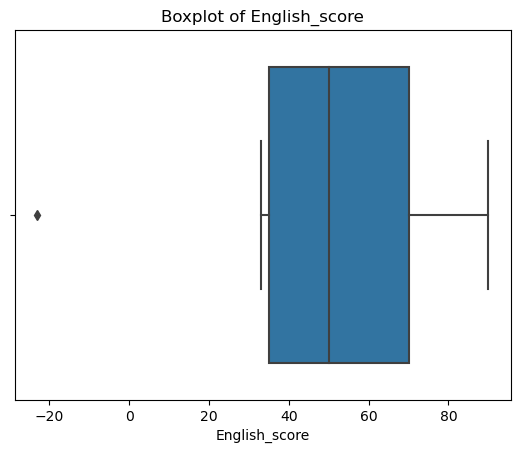

In [32]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create boxplots for numeric columns
for column in numeric_columns.columns:
    plt.figure()
    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [33]:
# as we can see we have outliers in 2 columns and now we will treat them 
# i will replace them with median 

# Calculate the first quartile (Q1)
Q1_math = df['Math_score'].quantile(0.25)
Q1_english = df['English_score'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3_math = df['Math_score'].quantile(0.75)
Q3_english = df['English_score'].quantile(0.75)

# Calculate the IQR for Math_score and English_score
IQR_math = Q3_math - Q1_math
IQR_english = Q3_english - Q1_english

# Define the upper and lower bounds
lower_bound_math = Q1_math - 1.5 * IQR_math
upper_bound_math = Q3_math + 1.5 * IQR_math

lower_bound_english = Q1_english - 1.5 * IQR_english
upper_bound_english = Q3_english + 1.5 * IQR_english

# Replace outliers with median
df['Math_score'] = df['Math_score'].apply(lambda x: df['Math_score'].median() if x < lower_bound_math or x > upper_bound_math else x)
df['English_score'] = df['English_score'].apply(lambda x: df['English_score'].median() if x < lower_bound_english or x > upper_bound_english else x)


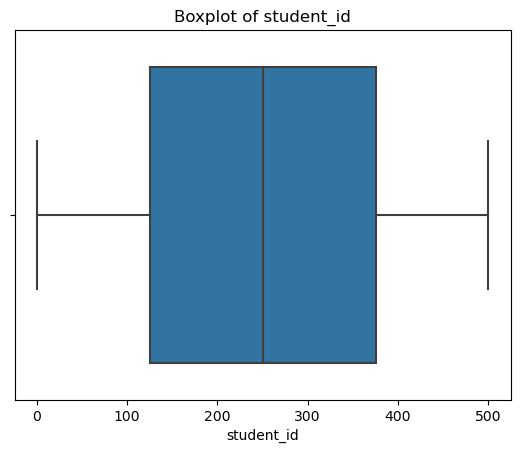

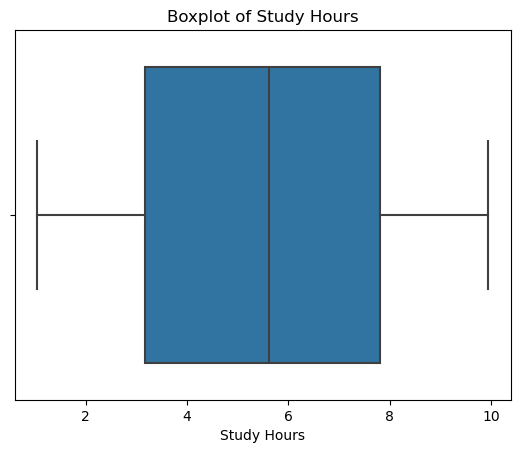

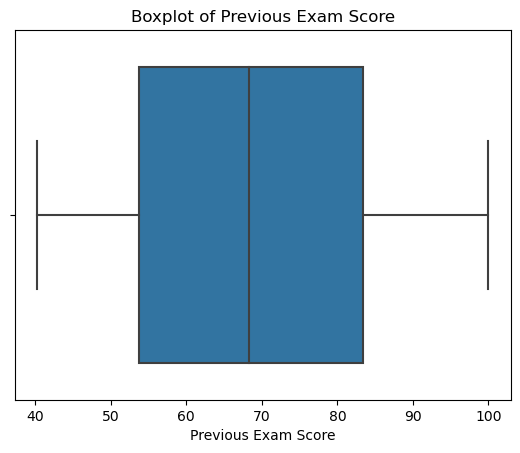

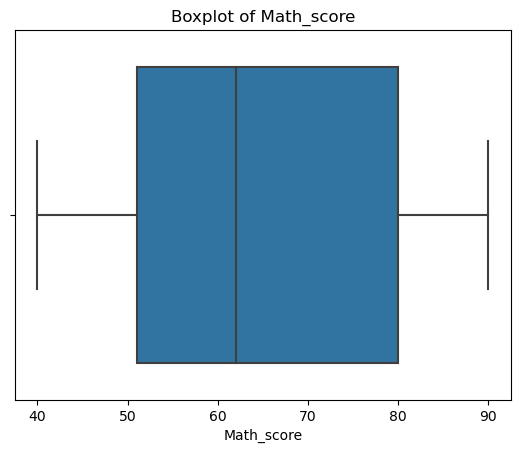

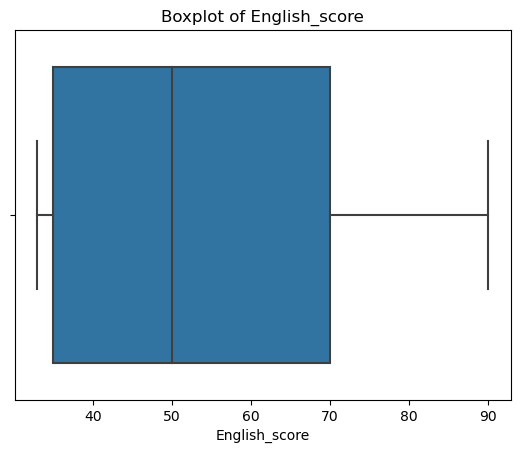

In [34]:
# after treating outliers let's check our code is working or not

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create boxplots for numeric columns
for column in numeric_columns.columns:
    plt.figure()
    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot of {column}')
    plt.show()


In [ ]:
#as we can see this our outlier treatment(iqr method) is working 

In [27]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
student_id             0
student_name           0
Study Hours            1
Previous Exam Score    1
Math_score             0
English_score          0
Pass/Fail              0
dtype: int64


In [38]:
# let's treat out missing values and replace missing values with median

df['Study Hours']= df['Study Hours'].replace(np.nan,df['Study Hours'].median())
df['Previous Exam Score']= df['Study Hours'].replace(np.nan,df['Previous Exam Score'].median())

In [39]:
# let's check missing value tratement code is working or not?
print(df.isnull().sum())

student_id             0
student_name           0
Study Hours            0
Previous Exam Score    0
Math_score             0
English_score          0
Pass/Fail              0
dtype: int64


In [ ]:
# as we can see it is working, we treat missing values, and outliers, and we don't have anomalies or bad-data 

In [41]:
# let's check the duplicate rows
duplicate = df.duplicated()
print('total duplicate rows' % (duplicate.sum()))

total duplicate rows


In [ ]:
# no duplicate values

In [42]:
# Convert 'Pass/Fail' column to numerical terms
df['Pass_or_Fail'] = df['Pass/Fail'].apply(lambda x: 1 if x == 'Pass' else 0)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           500 non-null    int64  
 1   student_name         500 non-null    object 
 2   Study Hours          500 non-null    float64
 3   Previous Exam Score  500 non-null    float64
 4   Math_score           500 non-null    float64
 5   English_score        500 non-null    float64
 6   Pass/Fail            500 non-null    object 
 7   Pass_or_Fail         500 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [44]:
df.head()

,student_id,student_name,Study Hours,Previous Exam Score,Math_score,English_score,Pass/Fail,Pass_or_Fail
0,1,John Smith,4.37,4.37,80.0,40.0,Fail,0
1,2,Emily Johnson,9.56,9.56,74.0,90.0,Pass,1
2,3,Michael Williams,7.59,7.59,51.0,70.0,Fail,0
3,4,Sarah Brown,6.39,6.39,80.0,60.0,Pass,1
4,5,David Jones,2.40,2.40,80.0,33.0,Fail,0


In [45]:
# now let's drop the pass/fail column cause now we have numerical y variable 
# Drop the original 'Pass/Fail' column
df.drop(columns=['Pass/Fail'], inplace=True)

In [46]:
df.head()

,student_id,student_name,Study Hours,Previous Exam Score,Math_score,English_score,Pass_or_Fail
0,1,John Smith,4.37,4.37,80.0,40.0,0
1,2,Emily Johnson,9.56,9.56,74.0,90.0,1
2,3,Michael Williams,7.59,7.59,51.0,70.0,0
3,4,Sarah Brown,6.39,6.39,80.0,60.0,1
4,5,David Jones,2.40,2.40,80.0,33.0,0


C:\Users\solan\AppData\Local\Temp\ipykernel_10820\793592701.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f")


<Axes: >

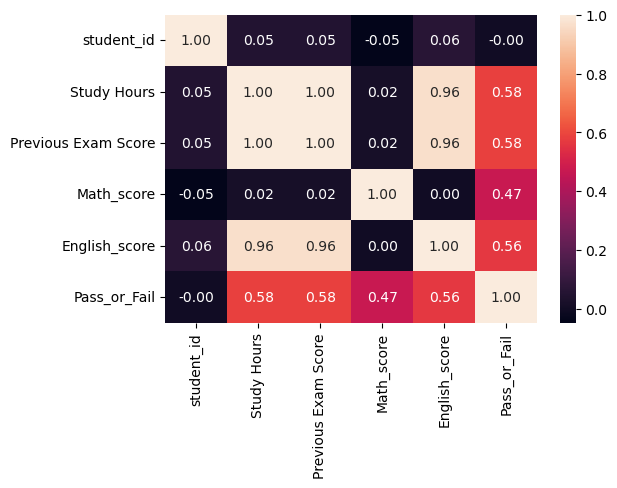

In [49]:
#let's check the  relatationship between x-variables(individual) via heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [ ]:
# as we can see we have less possibility so co-relation between x-variables(individual), so no need to remove any numerical column

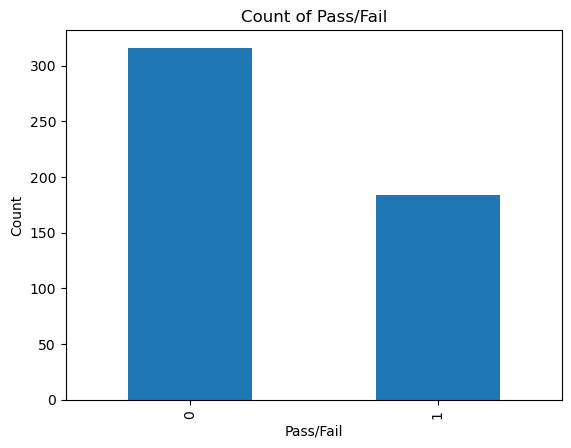

In [50]:
# Count of Pass/Fail
pass_fail_count = df['Pass_or_Fail'].value_counts()

# Visualize using a bar plot
pass_fail_count.plot(kind='bar', xlabel='Pass/Fail', ylabel='Count', title='Count of Pass/Fail')
plt.show()


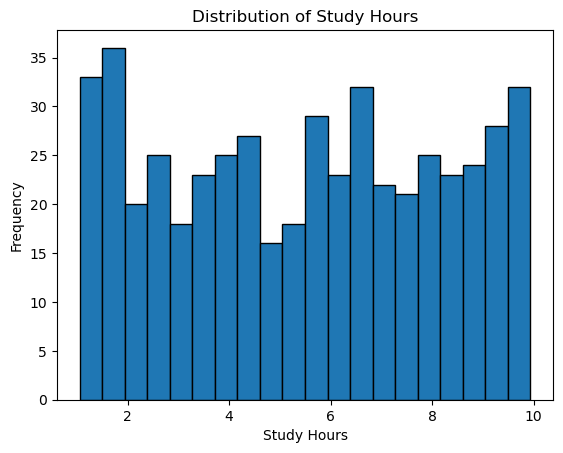

In [51]:
# Distribution of Study Hours
plt.hist(df['Study Hours'], bins=20, edgecolor='black')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Study Hours')
plt.show()


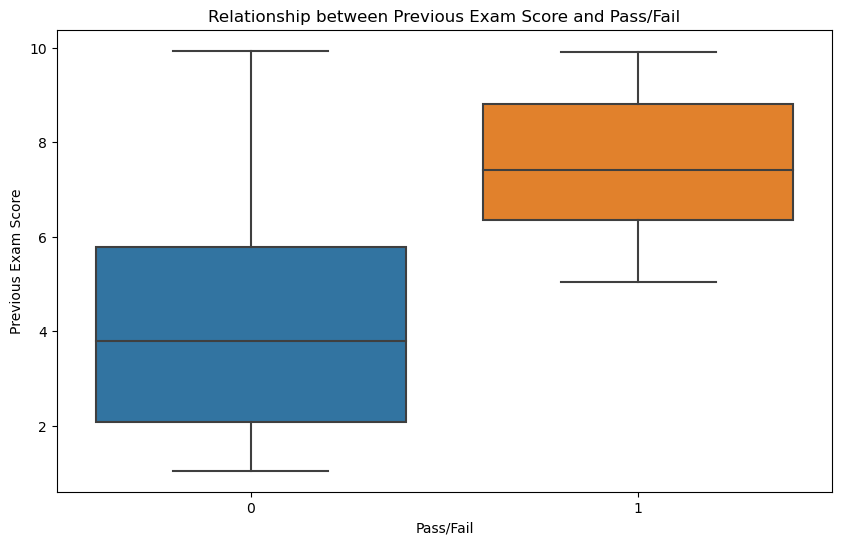

In [52]:
# Relationship between Previous Exam Score and Pass/Fail
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pass_or_Fail', y='Previous Exam Score', data=df)
plt.xlabel('Pass/Fail')
plt.ylabel('Previous Exam Score')
plt.title('Relationship between Previous Exam Score and Pass/Fail')
plt.show()


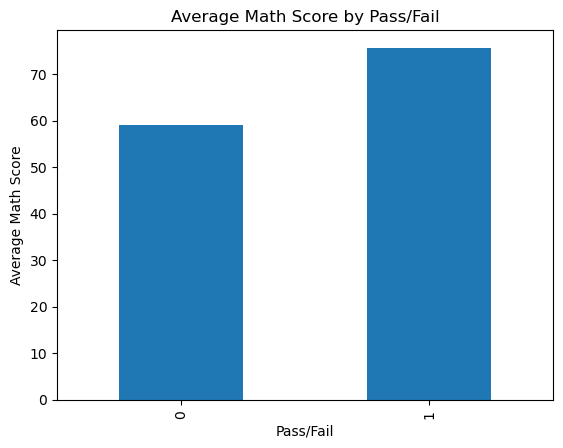

In [53]:
# Average Math Score by Pass/Fail
avg_math_score = df.groupby('Pass_or_Fail')['Math_score'].mean()

# Visualize using a bar plot
avg_math_score.plot(kind='bar', xlabel='Pass/Fail', ylabel='Average Math Score', title='Average Math Score by Pass/Fail')
plt.show()


In [54]:
# these are some information which can give us basic idea of insights 
# Drop 'student_id' and 'student_name' columns
df.drop(['student_id', 'student_name'], axis=1, inplace=True)

In [56]:
# Importing necessary library
from sklearn.model_selection import train_test_split

# Splitting the data into X and y
X = df.drop('Pass_or_Fail', axis=1)
y = df['Pass_or_Fail']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (400, 4)
Shape of X_test: (100, 4)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [59]:
from sklearn.linear_model import LogisticRegression
# Creating a Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions_test = model.predict(X_test)

# Making predictions
predictions_train = model.predict(X_train)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# let's check how good our model is in predictions
conf_matrix = confusion_matrix(y_test, predictions_test)

# Printing the classification report
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.84      0.84      0.84        37

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



Overall, it seems like model is performing satisfactorily based on these metrics. However, it's also essential to consider the specific requirements and context of your application to determine if the model's performance meets your needs. If you have specific thresholds or constraints, you may need to adjust the model or evaluation criteria accordingly.



In [71]:
#let's see in a proper way how was the predictions 



import pandas as pd

# Assuming you have predictions_test and y_test as lists or arrays
# Assuming you don't have student_ids_test because you dropped the student_id column

# Create a DataFrame with index as student IDs, predictions, and actual results
result_df = pd.DataFrame({
    'predictions_test': predictions_test,
    'y_test': y_test
})

# Set the display option to show all rows
pd.set_option('display.max_rows', None)


# Display the DataFrame
print(result_df)


     predictions_test  y_test
152                 0       0
480                 0       1
328                 1       0
487                 0       0
489                 1       1
22                  1       0
153                 1       1
86                  0       0
260                 0       0
88                  0       0
305                 1       1
85                  0       0
436                 0       0
84                  0       0
388                 0       0
413                 0       1
499                 1       1
112                 1       1
204                 0       0
433                 0       0
378                 0       0
303                 1       1
275                 0       0
142                 0       0
165                 0       0
333                 0       0
54                  1       1
406                 0       0
264                 0       0
137                 0       0
460                 0       0
229                 0       0
192       